<a href="https://colab.research.google.com/github/Saipraneeth798/Agriculture/blob/main/Agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset (replace 'yourfile.csv' with your filename)
df = pd.read_csv('/content/Andhra_pradesh.txt_-_Andhra_pradesh.txt.csv')

# Group by Year and Crop to sum Area
summary = df.groupby(['Crop_Year', 'Crop'])['Area'].sum().reset_index()

# Pivot the table for easy viewing
pivot_table = summary.pivot(index='Crop_Year', columns='Crop', values='Area')

# Show trends year by year
print(pivot_table)

# Save to Excel or CSV to view in spreadsheet
pivot_table.to_csv('crop_trends_output.csv')


Crop       Arecanut  Arhar/Tur    Bajra   Banana  Beans & Mutter(Vegetable)  \
Crop_Year                                                                     
2000          262.0   254599.0  98323.0  46908.0                        NaN   
2001          268.0   192046.0  55178.0  48136.0                        NaN   
2002          296.0   197256.0  52650.0  37079.0                     6026.0   
2003          311.0   249027.0  94859.0  36742.0                     6347.0   
2004            NaN   224573.0  65987.0  38877.0                        NaN   
2005          293.0   229011.0  54467.0  44873.0                        NaN   
2006          255.0   151300.0  40914.0  48413.0                        NaN   
2007            NaN   208000.0  50000.0      NaN                        NaN   
2008          359.0   181125.0  37265.0  52582.0                        NaN   
2009          386.0   170710.0  28604.0  56358.0                        NaN   
2010          438.0   296674.0  48212.0  56790.0    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/Andhra_pradesh.txt_-_Andhra_pradesh.txt.csv')

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andhra Pradesh,ANANTAPUR,2000,Kharif,Arhar/Tur,30693,7888.0
1,Andhra Pradesh,ANANTAPUR,2000,Kharif,Bajra,2477,1449.0
2,Andhra Pradesh,ANANTAPUR,2000,Kharif,Castor seed,9315,2831.0
3,Andhra Pradesh,ANANTAPUR,2000,Kharif,Cotton(lint),12025,16128.0
4,Andhra Pradesh,ANANTAPUR,2000,Kharif,Dry chillies,3755,10146.0


In [ ]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,61


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,8568.000000,8568.000000,8.507000e+03
mean,2007.116246,12972.311625,2.028121e+06
std,4.572442,45917.437168,2.961632e+07
min,2000.000000,1.000000,0.000000e+00
25%,2003.000000,145.000000,2.035000e+02
50%,2007.000000,1000.000000,1.869000e+03
75%,2011.000000,6004.250000,1.400000e+04
max,2014.000000,877029.000000,7.801620e+08


In [ ]:
df.dtypes

,0
State_Name,object
District_Name,object
Crop_Year,int64
Season,object
Crop,object
Area,int64
Production,float64


In [ ]:
# Drop rows where the target is NaN or Area is missing
df = df.dropna(subset=['Production', 'Area'])

# Optional: drop rows with missing critical features (you can add more columns to the list)
df = df.dropna(subset=['District_Name', 'Crop_Year', 'Season', 'Crop'])

# Remove outliers & zero area/production (optional)
df = df[(df['Area'] > 0) & (df['Production'] > 0)]

# Select features and target
features = ['District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']
X = df[features]
y = df['Production']

# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X, columns=['District_Name', 'Season', 'Crop'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Assess performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 724575.8713376933
R^2 Score: 0.9069977475890209


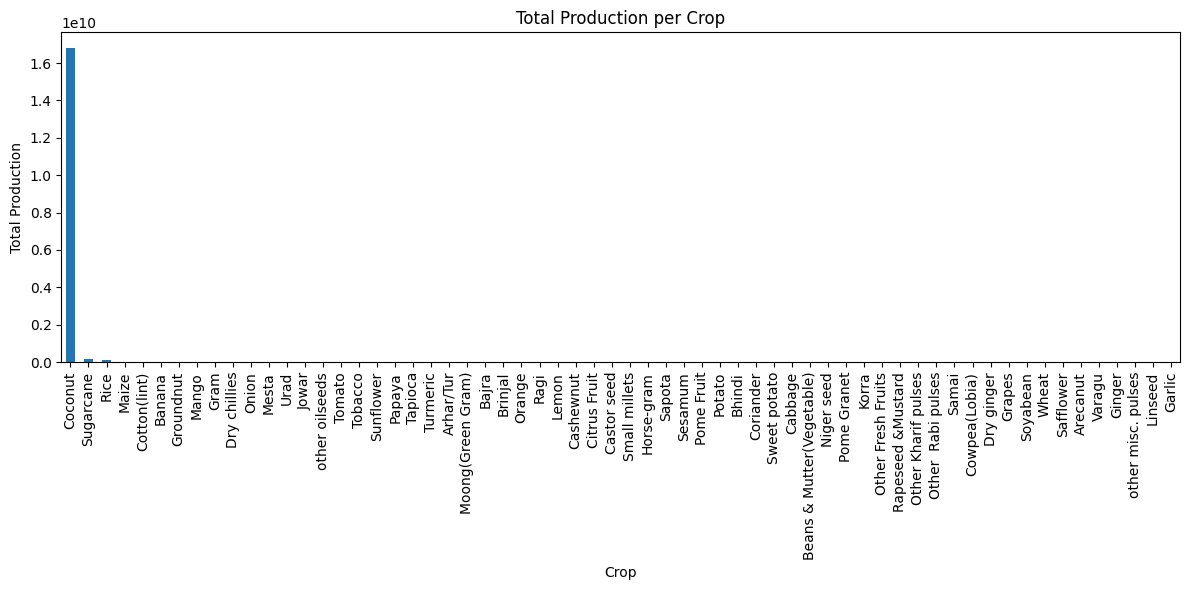

In [ ]:
# Preprocessing: Remove missing/outliers, encode categoricals
X = df[['District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
y = df['Production']
X = pd.get_dummies(X, columns=['District_Name', 'Season', 'Crop'])

# Model tuning: Use grid/randomized search for RF parameters

# Visualize total production per crop
import matplotlib.pyplot as plt
production_per_crop = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
production_per_crop.plot(kind='bar', figsize=(12,6), title='Total Production per Crop')
plt.ylabel('Total Production')
plt.xlabel('Crop')
plt.tight_layout()
plt.show()


Mean Absolute Error: 722022.5197733641
R2 Score: 0.8982322689853961


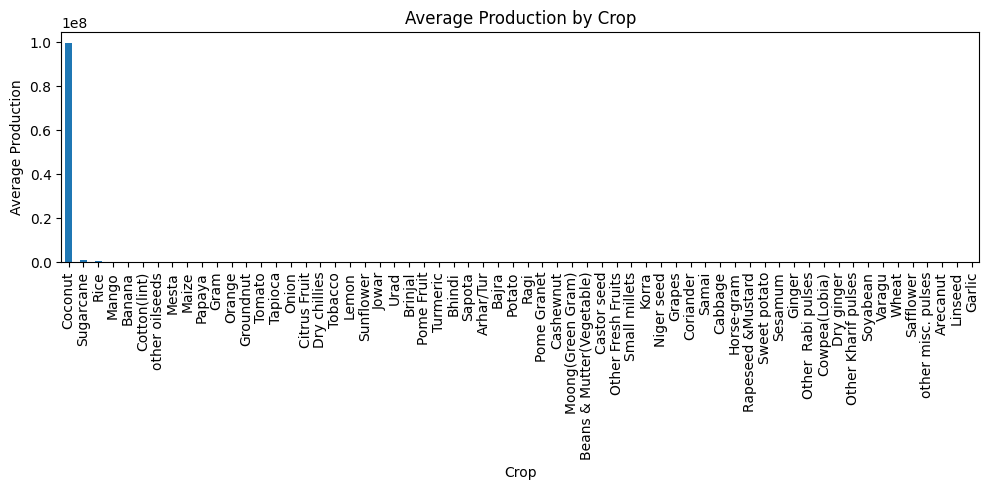

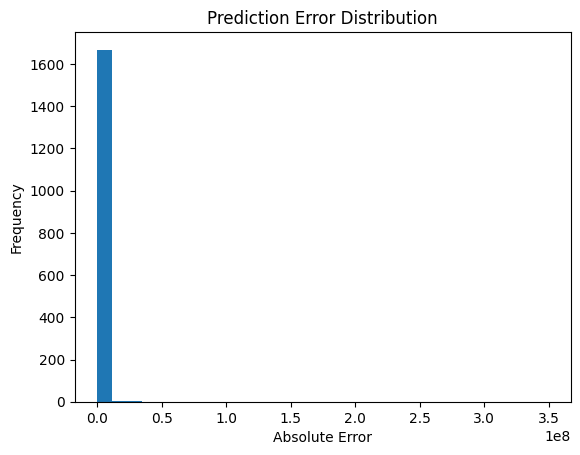

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('Andhra_pradesh.txt_-_Andhra_pradesh.txt.csv')

# Clean data
df = df.dropna(subset=['Production', 'Area', 'District_Name', 'Crop_Year', 'Season', 'Crop'])
df = df[(df['Production'] > 0) & (df['Area'] > 0)]
df['Area_Year'] = df['Area'] * df['Crop_Year']

# One-hot encode categoricals
feature_cols = ['District_Name', 'Season', 'Crop', 'Crop_Year', 'Area', 'Area_Year']
X = pd.get_dummies(df[feature_cols], drop_first=True)
y = np.log1p(df['Production'])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)
model = grid.best_estimator_

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Visualization: crop-wise mean production
prod_by_crop = df.groupby('Crop')['Production'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
prod_by_crop.plot(kind='bar')
plt.title("Average Production by Crop")
plt.xlabel("Crop")
plt.ylabel("Average Production")
plt.tight_layout()
plt.show()

# Visualization: error distribution
error = np.abs(np.expm1(y_test) - np.expm1(y_pred))
plt.figure()
plt.hist(error, bins=30)
plt.title("Prediction Error Distribution")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.show()


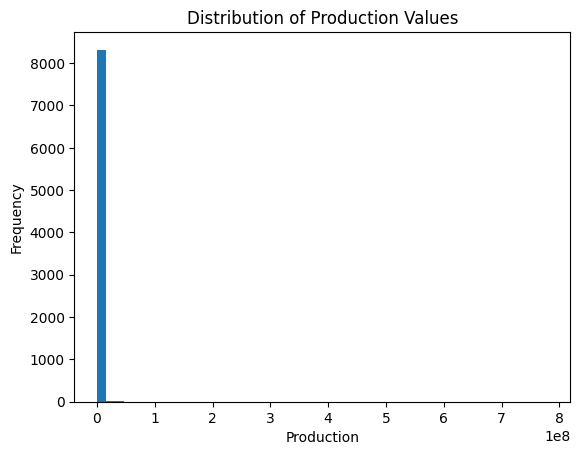

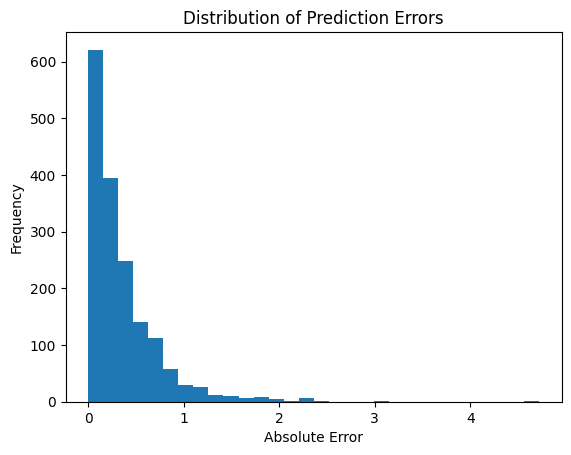

In [ ]:
# Plot distribution of Production
plt.hist(df['Production'], bins=50)
plt.title('Distribution of Production Values')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of absolute errors
import numpy as np
errors = np.abs(y_pred - y_test)
plt.hist(errors, bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)
model = grid.best_estimator_


In [ ]:
# Predict and invert log transformation
y_pred = np.expm1(model.predict(X_test))
y_test_orig = np.expm1(y_test)

mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.3f}")


Mean Absolute Error: 717450.42
R^2 Score: 0.899


/tmp/ipython-input-21-1773147372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prod_by_crop.index, y=prod_by_crop.values, palette="viridis")


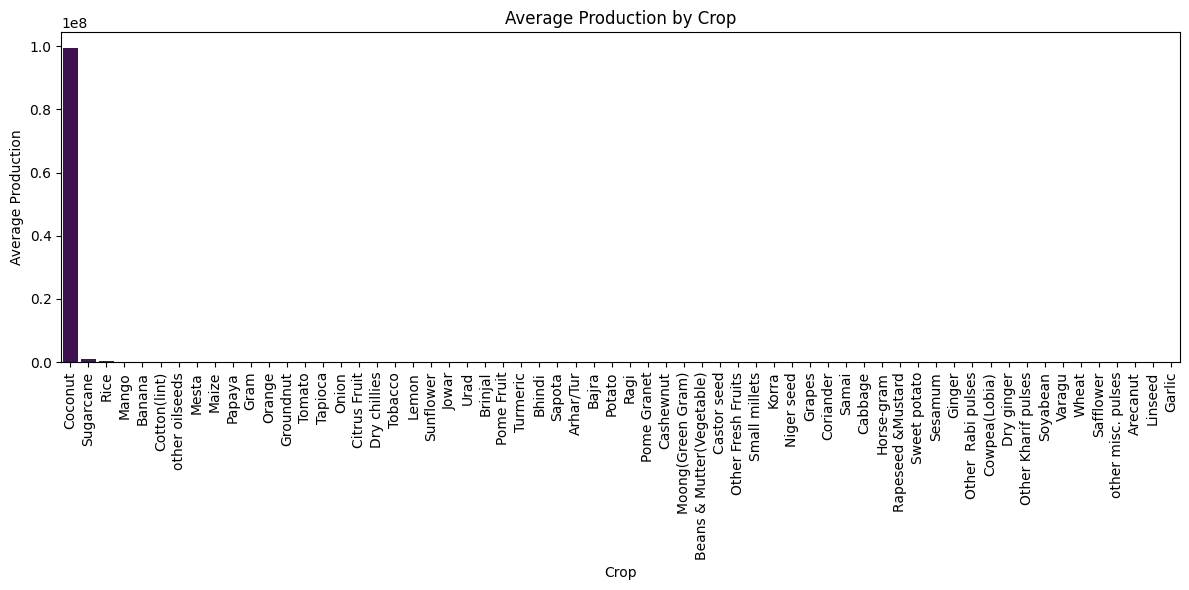

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=prod_by_crop.index, y=prod_by_crop.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Average Production by Crop')
plt.ylabel('Average Production')
plt.tight_layout()
plt.show()


In [ ]:
prod_by_crop = df.groupby('Crop')['Production'].mean().sort_values(ascending=False)


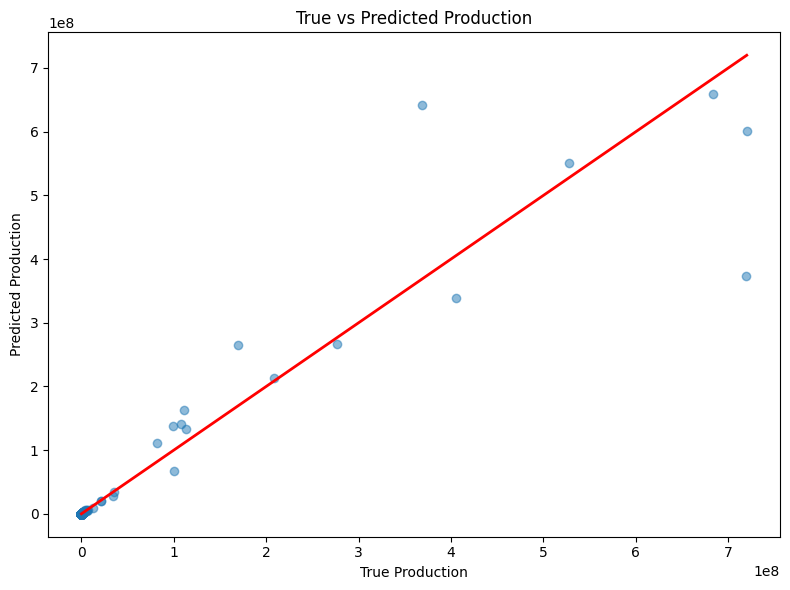

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.title('True vs Predicted Production')
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], color='red', lw=2)
plt.tight_layout()
plt.show()


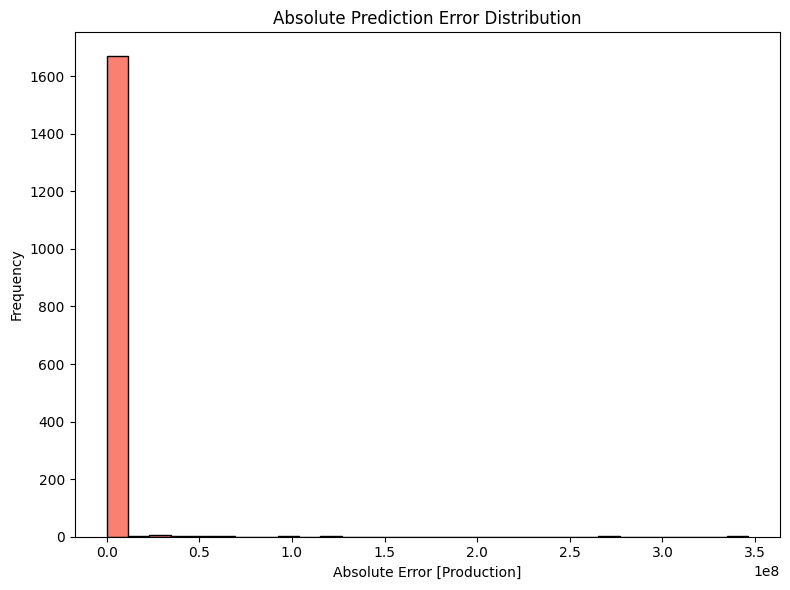

In [ ]:
errors = np.abs(y_test_orig - y_pred)
plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color='salmon', edgecolor='black')
plt.title("Absolute Prediction Error Distribution")
plt.xlabel("Absolute Error [Production]")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
crop_name = 'RICE'  # Change as needed
df_crop = df[df['Crop'].str.upper() == crop_name.upper()]
unique_years = sorted(df_crop['Crop_Year'].unique())
results = []

for year in unique_years:
    year_data = df_crop[df_crop['Crop_Year'] == year]
    # Get mean or total area (or customize further as needed)
    area = year_data['Area'].mean()
    # Use the most common district and season for basic prediction
    district = year_data['District_Name'].mode()[0]
    season = year_data['Season'].mode()[0]
    data = pd.DataFrame({'District_Name': [district], 'Season': [season],
                         'Area': [area], 'Crop_Year': [year]})
    data = pd.get_dummies(data, columns=['District_Name', 'Season'])
    # Align features as during training
    data = data.reindex(columns=X.columns, fill_value=0)
    pred = model.predict(data)[0]
    results.append({'Crop_Year': year, 'Predicted Production': pred})

# Display
df_results = pd.DataFrame(results)
print(df_results)


    Crop_Year  Predicted Production
0        2000              57151.22
1        2001              56733.58
2        2002              37930.31
3        2003              36380.10
4        2004              41872.66
5        2005              54122.58
6        2006              57984.95
7        2007              56136.62
8        2008              50093.32
9        2009              49702.29
10       2010              49145.69
11       2011              43606.66
12       2012              38776.55
13       2013              65652.54
14       2014              86288.95


In [ ]:
year = 2015
district = 'GUNTUR'  # Or any district present for the crop
season = 'Kharif'    # Or other valid season
area = 3000          # Example area

input_data = pd.DataFrame({'District_Name': [district], 'Season': [season],
                           'Area': [area], 'Crop_Year': [year]})
input_data = pd.get_dummies(input_data, columns=['District_Name', 'Season'])
input_data = input_data.reindex(columns=X.columns, fill_value=0)
pred = model.predict(input_data)[0]
print(f"Predicted production for {crop_name} in {year}: {pred:.2f}")


Predicted production for RICE in 2015: 1927.94


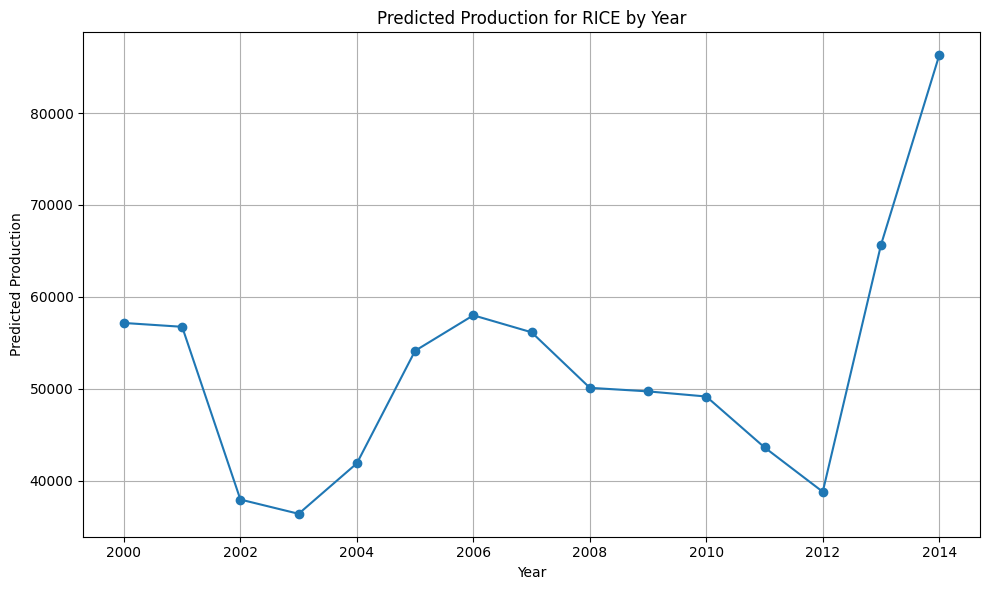

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_results['Crop_Year'], df_results['Predicted Production'], marker='o')
plt.title(f'Predicted Production for {crop_name} by Year')
plt.xlabel('Year')
plt.ylabel('Predicted Production')
plt.grid(True)
plt.tight_layout()
plt.show()
